<a href="https://colab.research.google.com/github/reitezuz/18NES1-2025-/blob/main/week3/linear_neuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear neuron

##1. LSQ Algorithm
- and the SSE, SAE, MSE, MAE error functions



In [297]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class LinearNeuron:
    def __init__(self, weights, bias):
        self.weights = np.array(weights, dtype=float)
        self.bias = bias
        self.epochs = -1

    def __str__(self):
        return f"LinearNeuron(weights={self.weights}, bias={self.bias})"

    def activation(self, x):
        return x

    def forward(self, inputs):
        potential = np.dot(inputs, self.weights) + self.bias
        return self.activation(potential)


    def LSQ(self, training_inputs, true_outputs):
        X_aug = np.hstack([training_inputs, np.ones((training_inputs.shape[0], 1))]) # extend the input by ones

        weights_aug, _, _, _ = np.linalg.lstsq(X_aug, true_outputs, rcond=None)     # using library function

        self.weights, self.bias = weights_aug[:-1], weights_aug[-1]

    def LSQ_pseudoinverse(self, training_inputs, true_outputs):
        X_aug = np.hstack([training_inputs, np.ones((training_inputs.shape[0], 1))]) # extend the input by ones

        weights_aug = np.linalg.pinv(X_aug.T @ X_aug) @ X_aug.T @ true_outputs   # using Moore-Penrose

        self.weights, self.bias = weights_aug[:-1], weights_aug[-1]

    def LSQ_tichonov(self, training_inputs, true_outputs):
        X_aug = np.hstack([training_inputs, np.ones((training_inputs.shape[0], 1))]) # extend the input by ones

        n = X_aug.shape[1]
        weights_aug = np.linalg.solve((X_aug.T @ X_aug) + np.eye(n), X_aug.T @ true_outputs)

        self.weights, self.bias = weights_aug[:-1], weights_aug[-1]

def plot_decision_boundary_2D(perceptron, training_inputs, true_outputs):
    """Plots the decision boundary of the perceptron."""
    import matplotlib.pyplot as plt
    import numpy as np

    # Extract the first two columns of training_inputs
    x1 = training_inputs[:, 0]
    x2 = training_inputs[:, 1]

    # Generate points for visualization
    x_min, x_max = np.min(x1) - 1, np.max(x1) + 1  # Extend the range slightly
    y_min, y_max = np.min(x2) - 1, np.max(x2) + 1  # Extend the range slightly

    x = np.linspace(x_min, x_max, 100)
    y = -(perceptron.weights[0] * x + perceptron.bias) / perceptron.weights[1]

    plt.figure(figsize=(5, 3))
    # Plot the decision boundary
    plt.plot(x, y, label='Decision Boundary')

    # Plot the points
    for i, input_vector in enumerate(training_inputs):
        if true_outputs[i] == 1:
            plt.scatter(input_vector[0], input_vector[1], color='green', label='Class 1' if i == 0 else "")  # Add label only for the first point of each class
        else:
            plt.scatter(input_vector[0], input_vector[1], color='red', label='Class -1' if i == 0 else "")

    plt.xlabel('x1', fontsize=12)
    plt.ylabel('x2', fontsize=12)
    plt.title('Perceptron Decision Boundary', fontsize=14)
    plt.grid(True)
    plt.legend()
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)  # Set y-axis limits

    # Highlight x and y axes
    plt.axhline(0, color='black', linewidth=0.8)  # x-axis
    plt.axvline(0, color='black', linewidth=0.8)  # y-axis
    plt.show()

def plot_regression(perceptron, training_inputs, true_outputs):
    """Plots the data points and the regression line."""
    plt.figure(figsize=(5, 3))
    plt.scatter(training_inputs, true_outputs, label="Data points", color='blue', alpha=0.6)

    # Generate predictions for the regression line
    X_test = np.linspace(-1, 1, 100).reshape(-1, 1)
    d_pred = perceptron.weights * X_test + perceptron.bias

    plt.plot(X_test, d_pred, label="Regression line", color='red', linewidth=2)
    plt.xlabel("x_1")
    plt.ylabel("y")
    plt.legend()
    plt.title("Linear Regression Fit")
    plt.show()

def sign(x):
    return np.where(x > 0, 1, np.where(x < 0, -1, 0))

def perceptron_error(true_outputs, predicted_outputs):
    return np.sum(true_outputs != predicted_outputs)

def SSE_error(true_outputs, predicted_outputs):
    # The Sum squared error
    return np.sum((true_outputs - predicted_outputs) ** 2)
def SAE_error(true_outputs, predicted_outputs):
    # The Sum absolute error
    return np.sum(np.abs(true_outputs - predicted_outputs))
def MAE_error(true_outputs, predicted_outputs):
    # The Mean absolute error
    return np.mean(np.abs(true_outputs - predicted_outputs))
def MSE_error(true_outputs, predicted_outputs):
    # The Mean squared error
    return np.mean((true_outputs - predicted_outputs) ** 2)


### Example 1
- train the linear neuron on the given data:
- you can change the training data ant the variant of LSQ:

LinearNeuron(weights=[-0.5 -0.5], bias=0.5)
LSQ: pseudoinverse
Perceptron error: 4
SSE error: 1.0
MSE error: 0.25
SAE error: 2.0
MAE error: 0.5


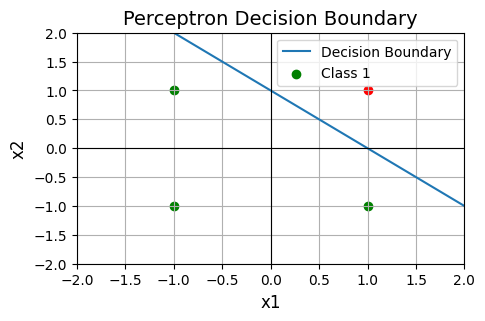

,Input,Predicted,True
0,"[-1, -1]",1.5,1
1,"[-1, 1]",0.5,1
2,"[1, -1]",0.5,1
3,"[1, 1]",-0.5,-1


In [298]:
# Example 1 from the presentation:
# Data:
inputs = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
true_outputs = np.array([1, 1, 1, -1])
#variant = "tichonov"
variant = "pseudoinverse"
#variant = "library"

# Perceptron parameters:
weights = [0, 0]
bias = 0

# Train the linear neuron:
perceptron = LinearNeuron(weights, bias)
if variant == "library":
    perceptron.LSQ(inputs, true_outputs)
elif variant == "pseudoinverse":
    perceptron.LSQ_pseudoinverse(inputs, true_outputs)
elif variant == "tichonov":
    perceptron.LSQ_tichonov(inputs, true_outputs)

# Print summary:
print(perceptron)
print("LSQ:", variant)
real_outputs = perceptron.forward(inputs) # forward for the whole dataset
print(f"Perceptron error: {perceptron_error(true_outputs, real_outputs)}")
print(f"SSE error: {SSE_error(true_outputs, real_outputs)}")
print(f"MSE error: {MSE_error(true_outputs, real_outputs)}")
print(f"SAE error: {SAE_error(true_outputs, real_outputs)}")
print(f"MAE error: {MAE_error(true_outputs, real_outputs)}")
plot_decision_boundary_2D(perceptron, inputs, true_outputs)

# Create a pandas DataFrame for a nice table
import pandas as pd
df = pd.DataFrame(columns=['Input', 'Predicted', 'True'])
for inputs, label in zip(inputs, true_outputs):
    df.loc[len(df)] = {'Input': inputs, 'Predicted': perceptron.forward(inputs), 'True': label}

df


- observe carefully the predicted values

### Example 2
- train the linear neuron on the given data:
- you can change the training data ant the variant of LSQ:

LinearNeuron(weights=[ 0.         -0.66666667], bias=0.0)
LSQ: tichonov
Perceptron error: 2
SSE error: 0.22222222222222227
MSE error: 0.11111111111111113
SAE error: 0.6666666666666667
MAE error: 0.33333333333333337


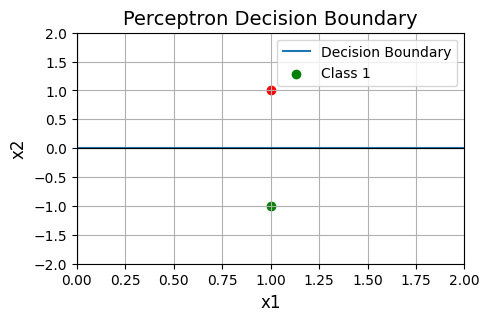

,Input,Predicted,True
0,"[1, -1]",0.666667,1
1,"[1, 1]",-0.666667,-1


In [299]:
# Example 2 from the presentation:
# Data:
inputs = np.array([[1, -1], [1, 1]])
true_outputs = np.array([1, -1])
#variant = "library"
#variant = "pseudoinverse"
variant = "tichonov"

# Perceptron parameters:
weights = [0, 0]
bias = 0

# Train the linear neuron:
perceptron = LinearNeuron(weights, bias)
if variant == "library":
    perceptron.LSQ(inputs, true_outputs)
elif variant == "pseudoinverse":
    perceptron.LSQ_pseudoinverse(inputs, true_outputs)
elif variant == "tichonov":
    perceptron.LSQ_tichonov(inputs, true_outputs)

# Print summary:
print(perceptron)
print("LSQ:", variant)
real_outputs = perceptron.forward(inputs) # forward for the whole dataset
error = perceptron_error(true_outputs, real_outputs)
print(f"Perceptron error: {perceptron_error(true_outputs, real_outputs)}")
print(f"SSE error: {SSE_error(true_outputs, real_outputs)}")
print(f"MSE error: {MSE_error(true_outputs, real_outputs)}")
print(f"SAE error: {SAE_error(true_outputs, real_outputs)}")
print(f"MAE error: {MAE_error(true_outputs, real_outputs)}")
plot_decision_boundary_2D(perceptron, inputs, true_outputs)

# Create a pandas DataFrame for a nice table
import pandas as pd
df = pd.DataFrame(columns=['Input', 'Predicted', 'True'])
for inputs, label in zip(inputs, true_outputs):
    df.loc[len(df)] = {'Input': inputs, 'Predicted': perceptron.forward(inputs), 'True': label}

df

### Example: XOR

LinearNeuron(weights=[0. 0.], bias=0.0)
LSQ: pseudoinverse
Perceptron error: 4
SSE error: 4.0
MSE error: 1.0


<ipython-input-297-58f923f798a1>:58: RuntimeWarning: invalid value encountered in divide
  y = -(perceptron.weights[0] * x + perceptron.bias) / perceptron.weights[1]


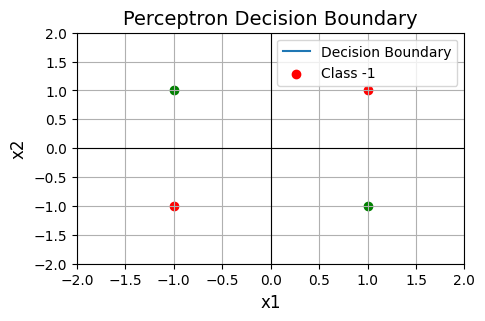

,Input,Predicted,True
0,"[-1, -1]",0.0,-1
1,"[-1, 1]",0.0,1
2,"[1, -1]",0.0,1
3,"[1, 1]",0.0,-1


In [300]:
# Example XOR:
# Data:
inputs = np.array([ [-1, -1],
                    [-1,  1],
                    [ 1, -1],
                    [ 1,  1]])
true_outputs = np.array([-1, 1, 1, -1])
#variant = "library"
variant = "pseudoinverse"
#variant = "tichonov"

# Perceptron parameters:
weights = [0, 0]
bias = 0

# Train the linear neuron:
perceptron = LinearNeuron(weights, bias)
if variant == "library":
    perceptron.LSQ(inputs, true_outputs)
elif variant == "pseudoinverse":
    perceptron.LSQ_pseudoinverse(inputs, true_outputs)
elif variant == "tichonov":
    perceptron.LSQ_tichonov(inputs, true_outputs)

# Print summary:
print(perceptron)
print("LSQ:", variant)
real_outputs = perceptron.forward(inputs) # forward for the whole dataset
print(f"Perceptron error: {perceptron_error(true_outputs, real_outputs)}")
print(f"SSE error: {SSE_error(true_outputs, real_outputs)}")
print(f"MSE error: {MSE_error(true_outputs, real_outputs)}")
plot_decision_boundary_2D(perceptron, inputs, true_outputs)

# Create a pandas DataFrame for a nice table
import pandas as pd
df = pd.DataFrame(columns=['Input', 'Predicted', 'True'])
for inputs, label in zip(inputs, true_outputs):
    df.loc[len(df)] = {'Input': inputs, 'Predicted': perceptron.forward(inputs), 'True': label}

df

### Example 3: Linear regression

LinearNeuron(weights=[[1.55575211]], bias=[3.00711376])
LSQ: library
Perceptron error: 100
MAE error: 0.16914232410485205
MSE error: 0.04561545832850948


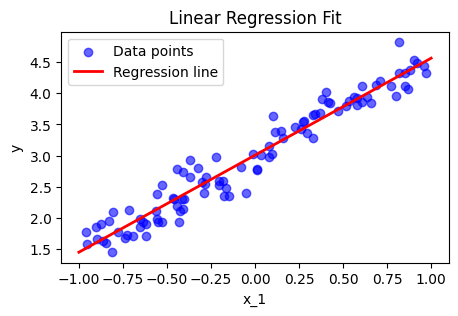

,Input,Predicted,True
0,[0.0818497744668436],[3.134451715453951],[3.1511571265900336]
1,[-0.5256061550847395],[2.1894008702876224],[2.536606569085486]
2,[0.09368374347048247],[3.1528624377211893],[3.0232664192602834]
3,[0.5348249567771897],[3.839168811882282],[3.8722433558350007]
4,[0.7695782295853895],[4.204386711782808],[4.112017072381019]
...,...,...,...
95,[0.11316923682029145],[3.1831770351477275],[3.3810112679730344]
96,[0.5763777667495633],[3.903814683743992],[3.8147644259410947]
97,[-0.149150036501994],[2.7750732717362094],[2.353530957783825]
98,[-0.2999553298817563],[2.5404576181046674],[2.5793996659023097]


In [301]:
# Example: linear regression
# Data:
N = 100  # The number of samples
D = 1  # The number of features
inputs = np.random.uniform(-1, 1, size=(N, D))  # Random values between -1 and 1
true_outputs = 1.5 * inputs[:, [0]] + 3 + np.random.randn(N, 1) / 5

variant = "library"
#variant = "pseudoinverse"
#variant = "tichonov"

# Perceptron parameters:
weights = [0]
bias = 0

# Train the linear neuron:
perceptron = LinearNeuron(weights, bias)
if variant == "library":
    perceptron.LSQ(inputs, true_outputs)
elif variant == "pseudoinverse":
    perceptron.LSQ_pseudoinverse(inputs, true_outputs)
elif variant == "tichonov":
    perceptron.LSQ_tichonov(inputs, true_outputs)

# Print summary:
print(perceptron)
print("LSQ:", variant)
real_outputs = perceptron.forward(inputs) # forward for the whole dataset
print(f"Perceptron error: {perceptron_error(true_outputs, real_outputs)}")
print(f"MAE error: {MAE_error(true_outputs, real_outputs)}")
print(f"MSE error: {MSE_error(true_outputs, real_outputs)}")
plot_regression(perceptron, inputs, true_outputs)

# Create a pandas DataFrame for a nice table
import pandas as pd
df = pd.DataFrame(columns=['Input', 'Predicted', 'True'])
for inputs, label in zip(inputs, true_outputs):
    df.loc[len(df)] = {'Input': inputs, 'Predicted': perceptron.forward(inputs), 'True': label}

df

##2. Iterative and batch gradient descent algorithm:


In [302]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class LinearNeuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
        self.epochs = -1

    def __str__(self):
        return f"LinearNeuron(weights={self.weights}, bias={self.bias})"

    def activation(self, x):
        return x

    def forward(self, inputs):
        potential = np.dot(inputs, self.weights) + self.bias
        return self.activation(potential)

    def LSQ(self, training_inputs, true_outputs):
        X_aug = np.hstack([training_inputs, np.ones((training_inputs.shape[0], 1))]) # extend the input by ones

        weights_aug, _, _, _ = np.linalg.lstsq(X_aug, true_outputs, rcond=None)     # using library function

        self.weights, self.bias = weights_aug[:-1], weights_aug[-1]

    def LSQ_pseudoinverse(self, training_inputs, true_outputs):
        X_aug = np.hstack([training_inputs, np.ones((training_inputs.shape[0], 1))]) # extend the input by ones

        weights_aug = np.linalg.pinv(X_aug.T @ X_aug) @ X_aug.T @ true_outputs   # using Moore-Penrose

        self.weights, self.bias = weights_aug[:-1], weights_aug[-1]

    def LSQ_tichonov(self, training_inputs, true_outputs):
        X_aug = np.hstack([training_inputs, np.ones((training_inputs.shape[0], 1))]) # extend the input by ones

        n = X_aug.shape[1]
        weights_aug = np.linalg.solve((X_aug.T @ X_aug) + np.eye(n), X_aug.T @ true_outputs)

        self.weights, self.bias = weights_aug[:-1], weights_aug[-1]

    def gradient_descent_iterative(self, training_inputs, true_outputs, learning_rate=1, epochs=100, adaptive_learning_rate=True, min_error=0, print_progress=True):
        if print_progress:
            print("Gradient Descent iterative:")
        learning_rate_0 = learning_rate
        for epoch in range(epochs):

            # Shuffle the training data for each epoch
            shuffled_indices = np.random.permutation(len(training_inputs))
            training_inputs = training_inputs[shuffled_indices]
            true_outputs = true_outputs[shuffled_indices]

            if adaptive_learning_rate:
                learning_rate = learning_rate_0 / ((epoch + 1)**0.5)

            for inputs, true_output in zip(training_inputs, true_outputs):
                prediction = self.forward(inputs)
                error = true_output - prediction
                self.weights += learning_rate * error * inputs
                self.bias += learning_rate * error
            mse = MSE_error(true_outputs, self.forward(training_inputs))


            if print_progress:
                print(f"Epoch: {epoch}, MSE: {mse:0.4f} Weights: {self.weights} {self.bias} Learning rate: {learning_rate:.4f}")

            if mse <= min_error:
                break
        if print_progress:
            print(f"The training ended after {epoch+1} epochs.")
        self.epochs = epoch+1
    def gradient_descent_batch(self, training_inputs, true_outputs, learning_rate=1, epochs=100, batch_size=32, adaptive_learning_rate=True, min_error=0, print_progress=True):
        if print_progress:
            print("Gradient Descent Batch:")
        learning_rate_0 = learning_rate
        num_samples = len(training_inputs)

        for epoch in range(epochs):
            # Shuffle the training data for each epoch
            shuffled_indices = np.random.permutation(num_samples)
            training_inputs = training_inputs[shuffled_indices]
            true_outputs = true_outputs[shuffled_indices].reshape(-1)  # Ensure it's (N,)

            if adaptive_learning_rate:
                learning_rate = learning_rate_0 / ((epoch + 1) ** 0.5)

            for i in range(0, num_samples, batch_size):
                batch_inputs = training_inputs[i:i + batch_size]  # (batch_size, D)
                batch_outputs = true_outputs[i:i + batch_size]  # (batch_size,)

                predictions = self.forward(batch_inputs)  # (batch_size,)
                errors = batch_outputs - predictions  # (batch_size,)

                # Compute gradients
                weight_gradient = (batch_inputs.T @ errors) / batch_size
                #weight_gradient = np.mean(errors[:, np.newaxis] * batch_inputs, axis=0)  # (D,)
                bias_gradient = np.mean(errors)  # Scalar

                # Ensure correct shape for weights
                weight_gradient = weight_gradient.reshape(self.weights.shape)  # Ensure (D,)

                # Update parameters
                self.weights += learning_rate * weight_gradient
                self.bias += learning_rate * bias_gradient

            mse = MSE_error(true_outputs, self.forward(training_inputs))

            if print_progress:
                print(f"Epoch: {epoch}, MSE: {mse:0.4f} Weights: {self.weights} Bias: {self.bias} Learning rate: {learning_rate:.4f}")

            if mse <= min_error:
                break

        if print_progress:
            print(f"The training ended after {epoch+1} epochs.")
        self.epochs = epoch + 1

def perceptron_error(true_outputs, predicted_outputs):
    return np.sum(true_outputs != predicted_outputs)
    #return np.isclose(true_outputs, predicted_outputs).sum()
    #return np.isclose(true_outputs, predicted_outputs).sum() / len(true_outputs)


### Example 1

Gradient Descent iterative:
Epoch: 0, MSE: 0.5307 Weights: [-0.19804737 -0.19913614] 0.18532969299025043 Learning rate: 0.1000
Epoch: 1, MSE: 0.3625 Weights: [-0.30820688 -0.32517532] 0.28760102763890705 Learning rate: 0.1000
Epoch: 2, MSE: 0.2864 Weights: [-0.40503524 -0.38716433] 0.3789211492145453 Learning rate: 0.1000
Epoch: 3, MSE: 0.2696 Weights: [-0.42981937 -0.43116098] 0.4001655046402672 Learning rate: 0.1000
Epoch: 4, MSE: 0.2585 Weights: [-0.45630282 -0.43645345] 0.4492942094324647 Learning rate: 0.1000
Epoch: 5, MSE: 0.2545 Weights: [-0.48406622 -0.46074549] 0.44753376335949585 Learning rate: 0.1000
Epoch: 6, MSE: 0.2541 Weights: [-0.47896321 -0.47555368] 0.44446970508491324 Learning rate: 0.1000
Epoch: 7, MSE: 0.2504 Weights: [-0.48491775 -0.49577212] 0.4877187642500467 Learning rate: 0.1000
Epoch: 8, MSE: 0.2505 Weights: [-0.48952606 -0.51965556] 0.5034240189411809 Learning rate: 0.1000
Epoch: 9, MSE: 0.2503 Weights: [-0.51553323 -0.50116075] 0.5033580673235813 Learning r

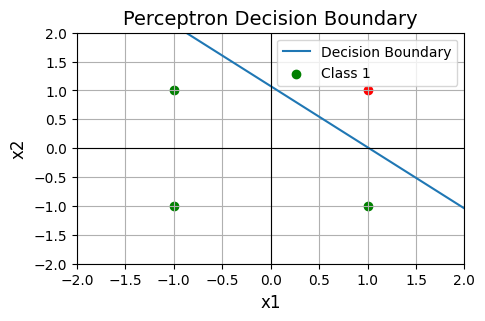

,Input,Predicted,True
0,"[-1, -1]",1.455685,1
1,"[-1, 1]",0.526947,1
2,"[1, -1]",0.472072,1
3,"[1, 1]",-0.456666,-1


In [303]:
# Example 1 from the presentation:
# Data:
inputs = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
true_outputs = np.array([1, 1, 1, -1])
print_progress = True
learning_rate = 0.1
adaptive_learning_rate = False
min_error = 0.0001
epochs = 15

# Perceptron parameters:
weights = np.random.randn(inputs.shape[1]) * 0.01
bias = float(np.random.randn() * 0.01)
# Train the linear neuron:
perceptron = LinearNeuron(weights, bias)
perceptron.gradient_descent_iterative(inputs, true_outputs, learning_rate, epochs, adaptive_learning_rate, min_error, print_progress)

# Print summary:
print(perceptron)
print("LSQ:", variant)
real_outputs = perceptron.forward(inputs) # forward for the whole dataset
error = perceptron_error(true_outputs, real_outputs)
print(f"Perceptron error: {error}")
print(f"MAE error: {MAE_error(true_outputs, real_outputs)}")
print(f"MSE error: {MSE_error(true_outputs, real_outputs)}")
plot_decision_boundary_2D(perceptron, inputs, true_outputs)

# Create a pandas DataFrame for a nice table
import pandas as pd
df = pd.DataFrame(columns=['Input', 'Predicted', 'True'])
for inputs, label in zip(inputs, true_outputs):
    df.loc[len(df)] = {'Input': inputs, 'Predicted': perceptron.forward(inputs), 'True': label}

df


### Example 2

Gradient Descent iterative:
Epoch: 0, MSE: 0.6388 Weights: [ 0.01516286 -0.20141484] 0.016699801032053457 Learning rate: 0.1000
Epoch: 1, MSE: 0.3989 Weights: [ 0.01709481 -0.36943635] 0.018631747090113934 Learning rate: 0.1000
Epoch: 2, MSE: 0.2490 Weights: [ 0.0166124  -0.50221198] 0.018149338552165065 Learning rate: 0.1000
Epoch: 3, MSE: 0.1551 Weights: [ 0.00502979 -0.60639985] 0.006566728637177943 Learning rate: 0.1000
Epoch: 4, MSE: 0.0968 Weights: [-0.00110955 -0.68893992] 0.0004273891486706316 Learning rate: 0.1000
Epoch: 5, MSE: 0.0604 Weights: [ 0.00213066 -0.75425571] 0.0036676009938333767 Learning rate: 0.1000
Epoch: 6, MSE: 0.0377 Weights: [-0.00142845 -0.80580403] 0.00010848863078712079 Learning rate: 0.1000
Epoch: 7, MSE: 0.0235 Weights: [ 7.64300016e-04 -8.46571984e-01] 0.0023012415366347183 Learning rate: 0.1000
Epoch: 8, MSE: 0.0147 Weights: [ 0.00171613 -0.87882252] 0.003253068798379881 Learning rate: 0.1000
Epoch: 9, MSE: 0.0092 Weights: [-4.39794746e-04 -9.04220101

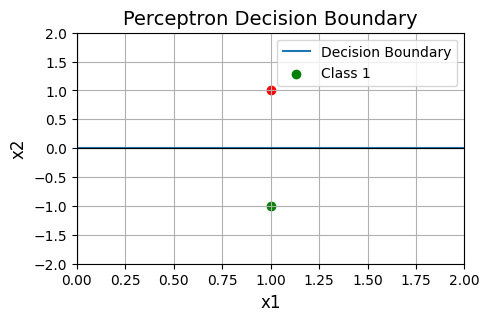

,Input,Predicted,True
0,"[1, -1]",0.972118,1
1,"[1, 1]",-0.968966,-1


In [304]:
# Example 2 from the presentation:
# Data:
inputs = np.array([[1, -1], [1, 1]])
true_outputs = np.array([1, -1])
print_progress = True
learning_rate = 0.1
adaptive_learning_rate = False
min_error = 0.0001
epochs = 15

# Perceptron parameters:
weights = np.random.randn(inputs.shape[1]) * 0.01
bias = float(np.random.randn() * 0.01)
# Train the linear neuron:
perceptron = LinearNeuron(weights, bias)
perceptron.gradient_descent_iterative(inputs, true_outputs, learning_rate, epochs, adaptive_learning_rate, min_error, print_progress)

# Print summary:
print(perceptron)
print("LSQ:", variant)
real_outputs = perceptron.forward(inputs) # forward for the whole dataset
error = perceptron_error(true_outputs, real_outputs)
print(f"Perceptron error: {error}")
print(f"MAE error: {MAE_error(true_outputs, real_outputs)}")
print(f"MSE error: {MSE_error(true_outputs, real_outputs)}")
plot_decision_boundary_2D(perceptron, inputs, true_outputs)

# Create a pandas DataFrame for a nice table
import pandas as pd
df = pd.DataFrame(columns=['Input', 'Predicted', 'True'])
for inputs, label in zip(inputs, true_outputs):
    df.loc[len(df)] = {'Input': inputs, 'Predicted': perceptron.forward(inputs), 'True': label}

df


### Example 3: linear regression
- experiment with the noise levels and with the parameters of the training parameters

(1,)
Gradient Descent iterative:
Epoch: 0, MSE: 0.0396 Weights: [1.46123909] 3.051241863991872 Learning rate: 0.1000
Epoch: 1, MSE: 0.0369 Weights: [1.55509245] 2.973760152257707 Learning rate: 0.0707
Epoch: 2, MSE: 0.0356 Weights: [1.53981834] 3.0072196623278797 Learning rate: 0.0577
Epoch: 3, MSE: 0.0358 Weights: [1.52886541] 3.02043768037609 Learning rate: 0.0500
Epoch: 4, MSE: 0.0368 Weights: [1.53377966] 2.97123686290379 Learning rate: 0.0447
Epoch: 5, MSE: 0.0379 Weights: [1.54791587] 2.959027187753584 Learning rate: 0.0408
Epoch: 6, MSE: 0.0359 Weights: [1.52700113] 2.989765400437713 Learning rate: 0.0378
Epoch: 7, MSE: 0.0356 Weights: [1.53017199] 3.007871965997395 Learning rate: 0.0354
Epoch: 8, MSE: 0.0356 Weights: [1.53377571] 3.006295410143389 Learning rate: 0.0333
Epoch: 9, MSE: 0.0357 Weights: [1.51869756] 3.0038793048809085 Learning rate: 0.0316
Epoch: 10, MSE: 0.0356 Weights: [1.53909952] 3.0058377893610855 Learning rate: 0.0302
Epoch: 11, MSE: 0.0359 Weights: [1.534859

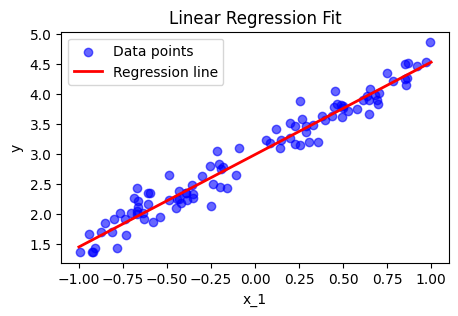

,Input,Predicted,True
0,[-0.44773153861769366],2.306284,2.106983
1,[0.610508610206774],3.933535,3.898715
2,[-0.9414100861116999],1.547157,1.673684
3,[-0.1566964968525424],2.753807,2.444063
4,[0.4516370894275734],3.689239,4.052825
...,...,...,...
95,[0.060109482201625486],3.087189,3.239449
96,[0.9206960140280562],4.410509,4.471509
97,[0.3820683448998081],3.582263,3.641267
98,[-0.3515025178511526],2.454255,2.344883


In [305]:
# Example: linear regression
# Data:
N = 100  # The number of samples
D = 1  # The number of features
inputs = np.random.uniform(-1, 1, size=(N, D))  # Random values between -1 and 1
true_outputs = (1.5 * inputs[:, [0]] + 3 + np.random.randn(N, 1) / 5).reshape(-1)

print_progress = True
learning_rate = 0.1
adaptive_learning_rate = True
min_error = 0.0001
epochs = 15

# Perceptron parameters:
weights = np.random.randn(D) * 0.01

print(np.shape(weights))
bias = float(np.random.randn() * 0.01)

# Train the linear neuron:
perceptron = LinearNeuron(weights, bias)
perceptron.gradient_descent_iterative(inputs, true_outputs, learning_rate, epochs, adaptive_learning_rate, min_error, print_progress)

# Print summary:
print(perceptron)
print("LSQ:", variant)
real_outputs = perceptron.forward(inputs) # forward for the whole dataset
error = perceptron_error(true_outputs, real_outputs)
print(f"Perceptron error: {error}")
print(f"MAE error: {MAE_error(true_outputs, real_outputs)}")
print(f"MSE error: {MSE_error(true_outputs, real_outputs)}")
plot_regression(perceptron, inputs, true_outputs)

# Create a pandas DataFrame for a nice table
import pandas as pd
df = pd.DataFrame(columns=['Input', 'Predicted', 'True'])
for inputs, label in zip(inputs, true_outputs):
    df.loc[len(df)] = {'Input': inputs, 'Predicted': perceptron.forward(inputs), 'True': label}
df


Gradient Descent Batch:
Epoch: 0, MSE: 7.4414 Weights: [0.01821017] Bias: 0.2864284919074652 Learning rate: 0.1000
Epoch: 1, MSE: 6.1365 Weights: [0.05058259] Bias: 0.5463295005332988 Learning rate: 0.1000
Epoch: 2, MSE: 5.0737 Weights: [0.08323854] Bias: 0.7804067073686148 Learning rate: 0.1000
Epoch: 3, MSE: 4.2072 Weights: [0.11603614] Bias: 0.9912439490658341 Learning rate: 0.1000
Epoch: 4, MSE: 3.5001 Weights: [0.14885142] Bias: 1.1811659498251874 Learning rate: 0.1000
Epoch: 5, MSE: 2.9222 Weights: [0.18157634] Bias: 1.3522643245000994 Learning rate: 0.1000
Epoch: 6, MSE: 2.4493 Weights: [0.21411715] Bias: 1.5064209715701806 Learning rate: 0.1000
Epoch: 7, MSE: 2.0618 Weights: [0.2463928] Bias: 1.6453291180003309 Learning rate: 0.1000
Epoch: 8, MSE: 1.7435 Weights: [0.27833356] Bias: 1.7705122517010725 Learning rate: 0.1000
Epoch: 9, MSE: 1.4817 Weights: [0.30987982] Bias: 1.8833411536423967 Learning rate: 0.1000
Epoch: 10, MSE: 1.2658 Weights: [0.34098092] Bias: 1.98504922038604

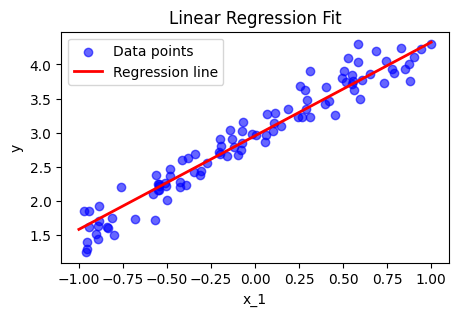

,Input,Predicted,True
0,[-0.8839351376020226],1.739351,1.917699
1,[-0.956084628320117],1.640253,1.292487
2,[0.421804459170916],3.532790,3.465563
3,[0.10449477972835597],3.096964,3.023369
4,[0.11454395720615551],3.110766,3.283868
...,...,...,...
95,[-0.5499153429099857],2.198129,2.239354
96,[0.14643303316419698],3.154566,3.090349
97,[0.10814944376547153],3.101983,3.136803
98,[-0.8116579898975989],1.838624,1.753499


In [306]:
# Example: linear regression
# Data:
N = 100  # The number of samples
D = 1  # The number of features
inputs = np.random.uniform(-1, 1, size=(N, D))  # Random values between -1 and 1
true_outputs = (1.5 * inputs[:, [0]] + 3 + np.random.randn(N, 1) / 5).reshape(-1)

print_progress = True
learning_rate = 0.1
adaptive_learning_rate = False
min_error = 0.0001
epochs = 100
batch_size=N

# Perceptron parameters:
weights = np.random.randn(D) * 0.01

bias = float(np.random.randn() * 0.01)

# Train the linear neuron:
perceptron = LinearNeuron(weights, bias)
perceptron.gradient_descent_batch(inputs, true_outputs, learning_rate, epochs, batch_size, adaptive_learning_rate, min_error, print_progress)

# Print summary:
print(perceptron)
print("LSQ:", variant)
real_outputs = perceptron.forward(inputs) # forward for the whole dataset
error = perceptron_error(true_outputs, real_outputs)
print(f"Perceptron error: {error}")
print(f"MAE error: {MAE_error(true_outputs, real_outputs)}")
print(f"MSE error: {MSE_error(true_outputs, real_outputs)}")
plot_regression(perceptron, inputs, true_outputs)

# Create a pandas DataFrame for a nice table
import pandas as pd
df = pd.DataFrame(columns=['Input', 'Predicted', 'True'])
for inputs, label in zip(inputs, true_outputs):
    df.loc[len(df)] = {'Input': inputs, 'Predicted': perceptron.forward(inputs), 'True': label}
df
